## Data Analysis for Face Detection

In [ ]:
# import Libraries
import os  
import json
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Define paths to the annotation files
train_annotations_path = 'train/_annotations.coco.json'
test_annotations_path = 'test/_annotations.coco.json'
valid_annotations_path = 'valid/_annotations.coco.json'

# Load COCO annotations
with open(train_annotations_path, 'r') as f:
    train_coco = json.load(f)
    
with open(test_annotations_path, 'r') as f:
    test_coco = json.load(f)
    
with open(valid_annotations_path, 'r') as f:
    valid_coco = json.load(f)

print("✓ Annotations loaded successfully!")

✓ Annotations loaded successfully!


In [4]:
# Function to create dataframe from COCO annotations
def create_dataframe_from_coco(coco_data, folder_name):
    """
    Convert COCO format annotations to a pandas DataFrame
    """
    # Extract images information
    images_df = pd.DataFrame(coco_data['images'])
    
    # Extract annotations information
    annotations_df = pd.DataFrame(coco_data['annotations'])
    
    # Extract categories information
    categories_df = pd.DataFrame(coco_data['categories'])
    
    # Merge annotations with images
    df = annotations_df.merge(images_df, left_on='image_id', right_on='id', suffixes=('_ann', '_img'))
    
    # Merge with categories to get category names
    df = df.merge(categories_df, left_on='category_id', right_on='id', suffixes=('', '_cat'))
    
    # Add full image path
    df['image_path'] = folder_name + '/' + df['file_name']
    
    # Extract bbox components
    df['bbox_x'] = df['bbox'].apply(lambda x: x[0])
    df['bbox_y'] = df['bbox'].apply(lambda x: x[1])
    df['bbox_width'] = df['bbox'].apply(lambda x: x[2])
    df['bbox_height'] = df['bbox'].apply(lambda x: x[3])
    
    # Select relevant columns
    columns_to_keep = ['id_ann', 'image_id', 'category_id', 'name', 'bbox_x', 'bbox_y', 
                       'bbox_width', 'bbox_height', 'area', 'file_name', 'image_path', 
                       'height', 'width']
    
    return df[columns_to_keep]

# Create dataframes for train, test, and validation sets
train_df = create_dataframe_from_coco(train_coco, 'train')
test_df = create_dataframe_from_coco(test_coco, 'test')
valid_df = create_dataframe_from_coco(valid_coco, 'valid')

print(f"Train set: {len(train_df)} annotations, {train_df['image_id'].nunique()} images")
print(f"Test set: {len(test_df)} annotations, {test_df['image_id'].nunique()} images")
print(f"Valid set: {len(valid_df)} annotations, {valid_df['image_id'].nunique()} images")

Train set: 489 annotations, 489 images
Test set: 71 annotations, 71 images
Valid set: 139 annotations, 139 images


In [11]:
train_df.head()

,id_ann,image_id,category_id,name,bbox_x,bbox_y,bbox_width,bbox_height,area,file_name,image_path,height,width
0,1,0,9,Jay V Retaga,822,912,1122.93,1649.16,1851891.239,IMG20230411105906_jpg.rf.cf8ecb1a5d1dc5baf2ed5...,train/IMG20230411105906_jpg.rf.cf8ecb1a5d1dc5b...,4000,3000
1,2,1,6,Carla E Dumas,1072,1032,1032.90,1497.15,1546406.235,IMG20230411104339_01_jpg.rf.1fb7be9117333afd2f...,train/IMG20230411104339_01_jpg.rf.1fb7be911733...,4000,3000
2,3,2,8,Jane M Ludivese,562,582,1630.88,2203.23,3593203.742,IMG20230412093814_jpg.rf.753f3a1298a674186922c...,train/IMG20230412093814_jpg.rf.753f3a1298a6741...,4000,3000
3,4,3,11,Jonalyn M Calimbo,982,1042,1162.89,1775.24,2064408.844,IMG20230411103053_jpg.rf.05f0ea823fa14beb051fe...,train/IMG20230411103053_jpg.rf.05f0ea823fa14be...,4000,3000
4,5,4,8,Jane M Ludivese,732,912,1548.87,2057.28,3186459.274,IMG20230412093638_jpg.rf.367b0c13fa70c0b66b770...,train/IMG20230412093638_jpg.rf.367b0c13fa70c0b...,4000,3000


In [5]:
# Display basic statistics and preview of each dataframe
print("="*60)
print("TRAIN SET")
print("="*60)
print(train_df.head())
print(f"\nShape: {train_df.shape}")
print(f"\nClass Distribution:")
print(train_df['name'].value_counts())

print("\n" + "="*60)
print("TEST SET")
print("="*60)
print(test_df.head())
print(f"\nShape: {test_df.shape}")
print(f"\nClass Distribution:")
print(test_df['name'].value_counts())

print("\n" + "="*60)
print("VALIDATION SET")
print("="*60)
print(valid_df.head())
print(f"\nShape: {valid_df.shape}")
print(f"\nClass Distribution:")
print(valid_df['name'].value_counts())

TRAIN SET
   id_ann  image_id  category_id               name  bbox_x  bbox_y  \
0       1         0            9       Jay V Retaga     822     912   
1       2         1            6      Carla E Dumas    1072    1032   
2       3         2            8    Jane M Ludivese     562     582   
3       4         3           11  Jonalyn M Calimbo     982    1042   
4       5         4            8    Jane M Ludivese     732     912   

   bbox_width  bbox_height         area  \
0     1122.93      1649.16  1851891.239   
1     1032.90      1497.15  1546406.235   
2     1630.88      2203.23  3593203.742   
3     1162.89      1775.24  2064408.844   
4     1548.87      2057.28  3186459.274   

                                           file_name  \
0  IMG20230411105906_jpg.rf.cf8ecb1a5d1dc5baf2ed5...   
1  IMG20230411104339_01_jpg.rf.1fb7be9117333afd2f...   
2  IMG20230412093814_jpg.rf.753f3a1298a674186922c...   
3  IMG20230411103053_jpg.rf.05f0ea823fa14beb051fe...   
4  IMG20230412093638_jpg

In [6]:
# Function to visualize an image with its bounding box annotations
def visualize_image_with_annotations(df, coco_data, index=0):
    """
    Visualize an image with its bounding box annotations
    """
    # Get unique images
    unique_images = df['image_id'].unique()
    img_id = unique_images[index]
    
    # Get image info
    img_info = [img for img in coco_data['images'] if img['id'] == img_id][0]
    img_path = df[df['image_id'] == img_id]['image_path'].iloc[0]
    
    # Load image
    img = Image.open(img_path)
    img_array = np.array(img)
    
    # Get all annotations for this image
    img_annotations = df[df['image_id'] == img_id]
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.imshow(img_array)
    
    # Draw bounding boxes
    colors = plt.cm.rainbow(np.linspace(0, 1, len(img_annotations)))
    
    for idx, (_, ann) in enumerate(img_annotations.iterrows()):
        x, y, w, h = ann['bbox_x'], ann['bbox_y'], ann['bbox_width'], ann['bbox_height']
        
        # Create rectangle
        rect = plt.Rectangle((x, y), w, h, linewidth=2, 
                            edgecolor=colors[idx], facecolor='none')
        ax.add_patch(rect)
        
        # Add label
        label = ann['name']
        ax.text(x, y - 10, label, color=colors[idx], fontsize=12, 
               weight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    ax.set_title(f"Image: {img_info['file_name']}\nSize: {img_info['width']}x{img_info['height']}", 
                fontsize=14, weight='bold')
    ax.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Print annotation details
    print(f"\nImage Details:")
    print(f"  File: {img_info['file_name']}")
    print(f"  Dimensions: {img_info['width']}x{img_info['height']}")
    print(f"  Number of annotations: {len(img_annotations)}")
    print(f"\nAnnotations:")
    print(img_annotations[['name', 'bbox_x', 'bbox_y', 'bbox_width', 'bbox_height', 'area']].to_string(index=False))

## Visualization: Sample Images with Annotations

### Train Set Sample

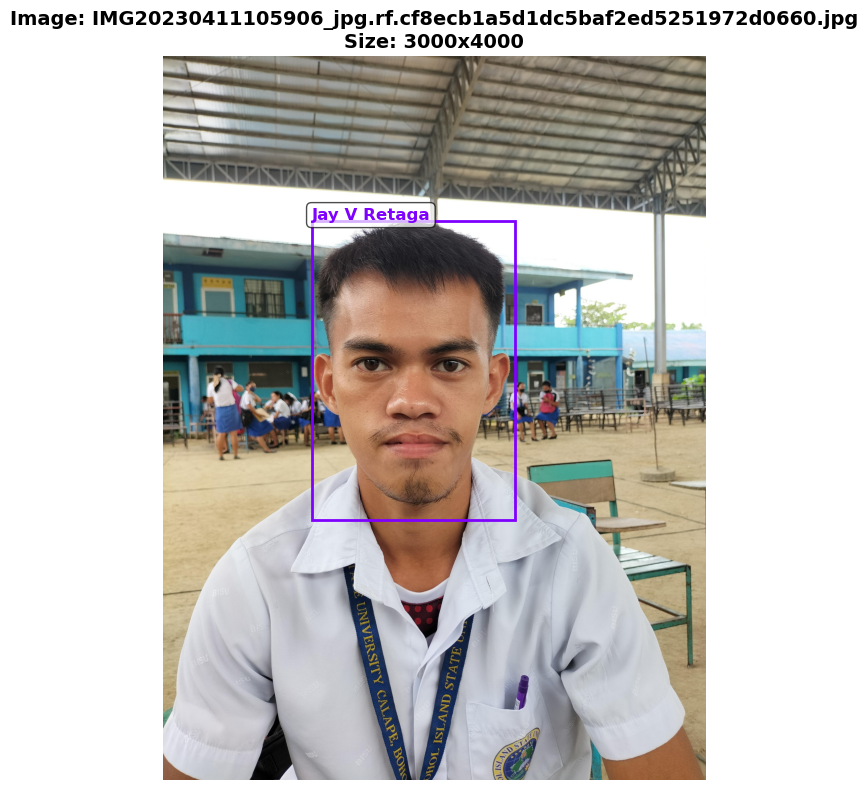


Image Details:
  File: IMG20230411105906_jpg.rf.cf8ecb1a5d1dc5baf2ed5251972d0660.jpg
  Dimensions: 3000x4000
  Number of annotations: 1

Annotations:
        name  bbox_x  bbox_y  bbox_width  bbox_height        area
Jay V Retaga     822     912     1122.93      1649.16 1851891.239


In [7]:
# Visualize a sample from the training set
visualize_image_with_annotations(train_df, train_coco, index=0)

### Test Set Sample

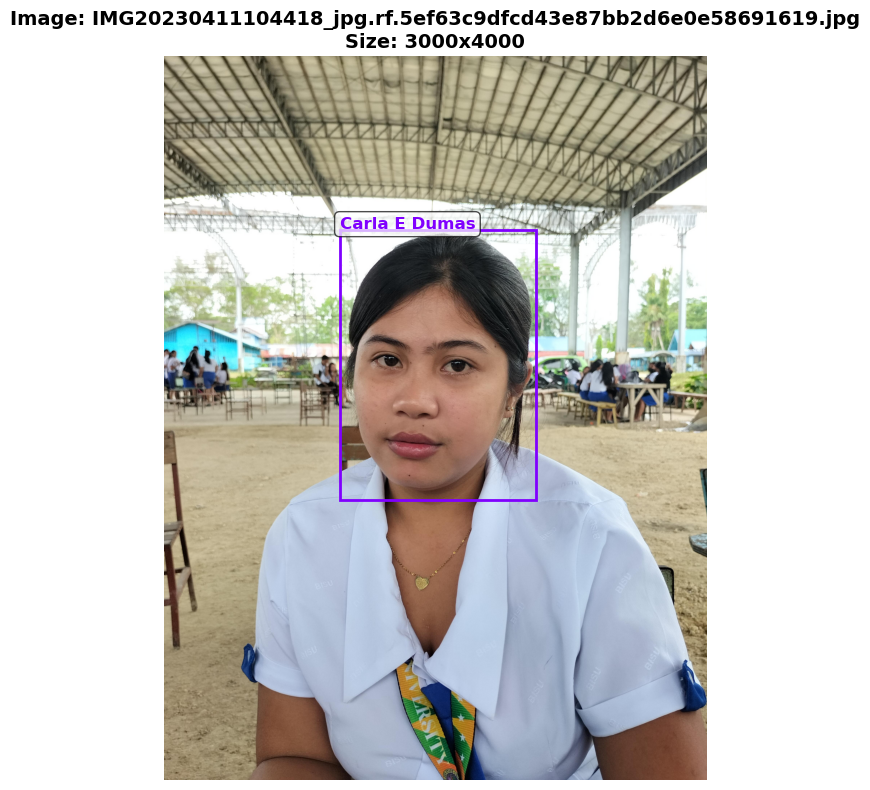


Image Details:
  File: IMG20230411104418_jpg.rf.5ef63c9dfcd43e87bb2d6e0e58691619.jpg
  Dimensions: 3000x4000
  Number of annotations: 1

Annotations:
         name  bbox_x  bbox_y  bbox_width  bbox_height        area
Carla E Dumas     972     962     1084.91      1487.13 1613402.208


In [8]:
# Visualize a sample from the test set
visualize_image_with_annotations(test_df, test_coco, index=0)

### Validation Set Sample

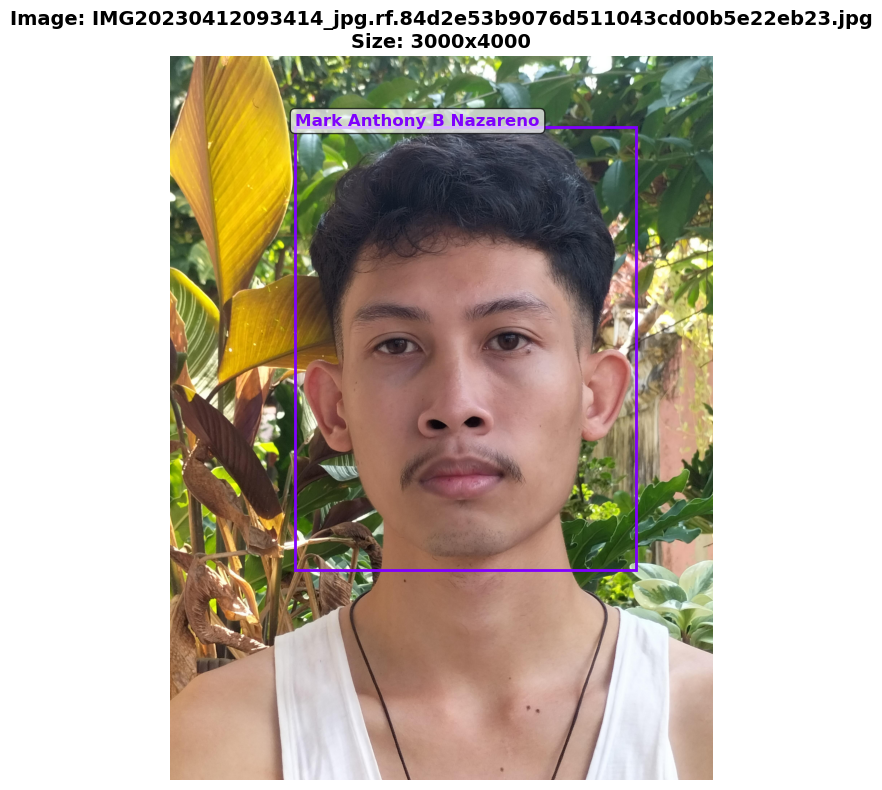


Image Details:
  File: IMG20230412093414_jpg.rf.84d2e53b9076d511043cd00b5e22eb23.jpg
  Dimensions: 3000x4000
  Number of annotations: 1

Annotations:
                   name  bbox_x  bbox_y  bbox_width  bbox_height        area
Mark Anthony B Nazareno     692     392     1884.82      2449.24 4616376.537


In [9]:
# Visualize a sample from the validation set
visualize_image_with_annotations(valid_df, valid_coco, index=0)

## Summary Statistics

In [10]:
# Create a comprehensive summary
summary_data = {
    'Dataset': ['Train', 'Test', 'Validation'],
    'Total Images': [
        train_df['image_id'].nunique(),
        test_df['image_id'].nunique(),
        valid_df['image_id'].nunique()
    ],
    'Total Annotations': [
        len(train_df),
        len(test_df),
        len(valid_df)
    ],
    'Avg Annotations per Image': [
        len(train_df) / train_df['image_id'].nunique(),
        len(test_df) / test_df['image_id'].nunique(),
        len(valid_df) / valid_df['image_id'].nunique()
    ],
    'Unique Classes': [
        train_df['name'].nunique(),
        test_df['name'].nunique(),
        valid_df['name'].nunique()
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*80)
print("DATASET SUMMARY")
print("="*80)
print(summary_df.to_string(index=False))

# Get categories
print("\n" + "="*80)
print("CATEGORIES/CLASSES")
print("="*80)
categories = train_coco['categories']
for cat in categories:
    print(f"  {cat['id']:2d}. {cat['name']}")


DATASET SUMMARY
   Dataset  Total Images  Total Annotations  Avg Annotations per Image  Unique Classes
     Train           489                489                        1.0              14
      Test            71                 71                        1.0              14
Validation           139                139                        1.0              14

CATEGORIES/CLASSES
   0. Student-faces
   1. Al Vincent C Acain
   2. Alma T Ruiz
   3. Anfernee C Seprado
   4. Angelika A Guadez
   5. Antoniette M Refulle
   6. Carla E Dumas
   7. James C Baron
   8. Jane M Ludivese
   9. Jay V Retaga
  10. Jee Hannah C Cabasag
  11. Jonalyn M Calimbo
  12. Joshua V Almodiel
  13. Mark Anthony B Nazareno
  14. Queenie Mae A Carnicer


## Base Model: Yolov8n 

### Setup YOLOv8n Model

First, let's prepare the dataset in YOLO format and set up the training configuration.

In [12]:
# Import YOLOv8 from ultralytics
from ultralytics import YOLO
import yaml
import shutil
from pathlib import Path

print("✓ Ultralytics YOLO imported successfully!")

✓ Ultralytics YOLO imported successfully!


In [13]:
# Function to convert COCO to YOLO format
def coco_to_yolo_format(coco_data, output_folder, images_folder):
    """
    Convert COCO annotations to YOLO format
    YOLO format: <class_id> <x_center> <y_center> <width> <height> (all normalized)
    """
    # Create output directory for labels
    labels_dir = Path(output_folder) / 'labels'
    labels_dir.mkdir(parents=True, exist_ok=True)
    
    # Create images directory
    images_dir = Path(output_folder) / 'images'
    images_dir.mkdir(parents=True, exist_ok=True)
    
    # Process each image
    for img_data in coco_data['images']:
        img_id = img_data['id']
        img_name = img_data['file_name']
        img_width = img_data['width']
        img_height = img_data['height']
        
        # Get annotations for this image
        img_annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == img_id]
        
        # Create YOLO format label file
        label_name = Path(img_name).stem + '.txt'
        label_path = labels_dir / label_name
        
        with open(label_path, 'w') as f:
            for ann in img_annotations:
                # Get bbox in COCO format (x, y, width, height)
                x, y, w, h = ann['bbox']
                
                # Convert to YOLO format (x_center, y_center, width, height) - normalized
                x_center = (x + w / 2) / img_width
                y_center = (y + h / 2) / img_height
                width_norm = w / img_width
                height_norm = h / img_height
                
                # Class ID
                class_id = ann['category_id']
                
                # Write to file
                f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width_norm:.6f} {height_norm:.6f}\n")
        
        # Copy image to new location
        src_img = Path(images_folder) / img_name
        dst_img = images_dir / img_name
        if src_img.exists() and not dst_img.exists():
            shutil.copy(src_img, dst_img)
    
    print(f"✓ Converted {len(coco_data['images'])} images to YOLO format in {output_folder}")

# Create YOLO dataset structure
yolo_dataset_path = Path('yolo_dataset')
yolo_dataset_path.mkdir(exist_ok=True)

# Convert train, test, and validation sets
coco_to_yolo_format(train_coco, yolo_dataset_path / 'train', 'train')
coco_to_yolo_format(test_coco, yolo_dataset_path / 'test', 'test')
coco_to_yolo_format(valid_coco, yolo_dataset_path / 'val', 'valid')

✓ Converted 489 images to YOLO format in yolo_dataset\train
✓ Converted 71 images to YOLO format in yolo_dataset\test
✓ Converted 71 images to YOLO format in yolo_dataset\test
✓ Converted 139 images to YOLO format in yolo_dataset\val
✓ Converted 139 images to YOLO format in yolo_dataset\val


In [14]:
# Create YAML configuration file for YOLO
yaml_config = {
    'path': str(Path('yolo_dataset').absolute()),  # Dataset root directory
    'train': 'train/images',  # Train images path relative to 'path'
    'val': 'val/images',      # Validation images path relative to 'path'
    'test': 'test/images',    # Test images path relative to 'path'
    
    # Number of classes
    'nc': len(train_coco['categories']),
    
    # Class names
    'names': {cat['id']: cat['name'] for cat in train_coco['categories']}
}

# Save YAML configuration
yaml_path = yolo_dataset_path / 'data.yaml'
with open(yaml_path, 'w') as f:
    yaml.dump(yaml_config, f, default_flow_style=False, sort_keys=False)

print("✓ YAML configuration created successfully!")
print(f"\nDataset Configuration:")
print(f"  Path: {yaml_config['path']}")
print(f"  Number of classes: {yaml_config['nc']}")
print(f"  Classes: {list(yaml_config['names'].values())}")

# Display YAML content
print("\n" + "="*80)
print("data.yaml Content:")
print("="*80)
with open(yaml_path, 'r') as f:
    print(f.read())

✓ YAML configuration created successfully!

Dataset Configuration:
  Path: d:\Zindi\Face Detection\yolo_dataset
  Number of classes: 15
  Classes: ['Student-faces', 'Al Vincent C Acain', 'Alma T Ruiz', 'Anfernee C Seprado', 'Angelika A Guadez', 'Antoniette M Refulle', 'Carla E Dumas', 'James C Baron', 'Jane M Ludivese', 'Jay V Retaga', 'Jee Hannah C Cabasag', 'Jonalyn M Calimbo', 'Joshua V Almodiel', 'Mark Anthony B Nazareno', 'Queenie Mae A Carnicer']

data.yaml Content:
path: d:\Zindi\Face Detection\yolo_dataset
train: train/images
val: val/images
test: test/images
nc: 15
names:
  0: Student-faces
  1: Al Vincent C Acain
  2: Alma T Ruiz
  3: Anfernee C Seprado
  4: Angelika A Guadez
  5: Antoniette M Refulle
  6: Carla E Dumas
  7: James C Baron
  8: Jane M Ludivese
  9: Jay V Retaga
  10: Jee Hannah C Cabasag
  11: Jonalyn M Calimbo
  12: Joshua V Almodiel
  13: Mark Anthony B Nazareno
  14: Queenie Mae A Carnicer



### Train YOLOv8n Model

Now let's train the YOLOv8n model on our student face dataset.

In [21]:
# Load YOLOv8n model (pretrained on COCO)
model = YOLO('yolov8n.pt')  # Load pretrained YOLOv8n model

print("✓ YOLOv8n model loaded successfully!")
print("\nModel Information:")
print(f"  Model Type: YOLOv8n (Nano)")
print(f"  Parameters: ~3.2M")
print(f"  Input Size: 640x640 (default)")

100%|██████████| 6.25M/6.25M [00:01<00:00, 3.71MB/s]



✓ YOLOv8n model loaded successfully!

Model Information:
  Model Type: YOLOv8n (Nano)
  Parameters: ~3.2M
  Input Size: 640x640 (default)


In [22]:
# Train the model
results = model.train(
    data=str(yaml_path),          # Path to data.yaml
    epochs=100,                    # Number of training epochs
    imgsz=640,                     # Image size
    batch=16,                      # Batch size (adjust based on GPU memory)
    name='student_face_detection', # Experiment name
    patience=5,                   # Early stopping patience
    save=True,                     # Save checkpoints
    plots=True,                    # Generate plots
    device=0,                      # Use GPU 0 (use 'cpu' if no GPU available)
    verbose=True,                  # Verbose output
    
    # Augmentation parameters
    hsv_h=0.015,                   # Image HSV-Hue augmentation
    hsv_s=0.7,                     # Image HSV-Saturation augmentation
    hsv_v=0.4,                     # Image HSV-Value augmentation
    degrees=0.0,                   # Image rotation (+/- deg)
    translate=0.1,                 # Image translation (+/- fraction)
    scale=0.5,                     # Image scale (+/- gain)
    flipud=0.0,                    # Vertical flip probability
    fliplr=0.5,                    # Horizontal flip probability
    mosaic=1.0,                    # Mosaic augmentation probability
)

print("\n" + "="*80)
print("Training Complete!")
print("="*80)

New https://pypi.org/project/ultralytics/8.3.221 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.109  Python-3.12.9 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)
Ultralytics 8.3.109  Python-3.12.9 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=yolo_dataset\data.yaml, epochs=100, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=student_face_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, a

100%|██████████| 5.35M/5.35M [00:00<00:00, 6.27MB/s]



AMP: checks passed 


train: Scanning D:\Zindi\Face Detection\yolo_dataset\train\labels... 489 images, 0 backgrounds, 0 corrupt: 100%|██████████| 489/489 [00:00<00:00, 566.95it/s]



train: New cache created: D:\Zindi\Face Detection\yolo_dataset\train\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning D:\Zindi\Face Detection\yolo_dataset\val\labels... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<00:00, 283.90it/s]



val: New cache created: D:\Zindi\Face Detection\yolo_dataset\val\labels.cache
Plotting labels to runs\detect\student_face_detection\labels.jpg... 
Plotting labels to runs\detect\student_face_detection\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\student_face_detection
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       

      1/100      2.13G       0.75      3.921      1.165         15        640: 100%|██████████| 31/31 [00:11<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]

                   all        139        139     0.0489          1      0.276      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.23G     0.6248      2.857      1.024         25        640: 100%|██████████| 31/31 [00:06<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]

                   all        139        139      0.918      0.323      0.652      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.24G     0.6115      2.049      1.004         18        640: 100%|██████████| 31/31 [00:06<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.85it/s]

                   all        139        139      0.744      0.681      0.874      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.27G     0.5775      1.597     0.9787         23        640: 100%|██████████| 31/31 [00:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.82it/s]

                   all        139        139        0.9      0.923       0.97      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.28G     0.5638      1.339     0.9658         19        640: 100%|██████████| 31/31 [00:06<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]

                   all        139        139      0.891       0.94      0.989      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       2.3G     0.5469      1.174     0.9366         23        640: 100%|██████████| 31/31 [00:06<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]

                   all        139        139      0.919      0.985      0.984      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.31G     0.5332      1.113     0.9358         24        640: 100%|██████████| 31/31 [00:06<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]

                   all        139        139      0.909       0.98       0.98       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.33G     0.5346       1.04     0.9428         17        640: 100%|██████████| 31/31 [00:06<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.22it/s]

                   all        139        139       0.97      0.975      0.982      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.35G     0.5482     0.9421      0.941         20        640: 100%|██████████| 31/31 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]

                   all        139        139      0.973      0.978      0.983      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.37G      0.524     0.9026     0.9158         24        640: 100%|██████████| 31/31 [00:06<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.15it/s]

                   all        139        139      0.968      0.983      0.983      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.38G       0.52     0.8815     0.9286         19        640: 100%|██████████| 31/31 [00:06<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]

                   all        139        139      0.964      0.981      0.982      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       2.4G     0.5282     0.8474     0.9204         16        640: 100%|██████████| 31/31 [00:06<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]

                   all        139        139      0.977      0.985      0.985      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.42G     0.5252     0.8054     0.9325         19        640: 100%|██████████| 31/31 [00:06<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.03it/s]

                   all        139        139      0.979      0.981      0.989      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.44G     0.5076     0.7664     0.9243         17        640: 100%|██████████| 31/31 [00:07<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.31it/s]

                   all        139        139      0.967      0.984      0.989      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.45G     0.5195     0.7665     0.9313         19        640: 100%|██████████| 31/31 [00:06<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]

                   all        139        139      0.964      0.983      0.987      0.884


EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 10, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

15 epochs completed in 0.037 hours.

15 epochs completed in 0.037 hours.
Optimizer stripped from runs\detect\student_face_detection\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\student_face_detection\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\student_face_detection\weights\best.pt, 6.2MB

Validating runs\detect\student_face_detection\weights\best.pt...
Ultralytics 8.3.109  Python-3.12.9 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)
Optimizer stripped from runs\detect\student_face_detection\weights\best.pt, 6.2MB

Validating runs\detect\student_face_detection\weights\best.pt...
Ultralytics 8.3.109  Python-3.12.9 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 819

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.56it/s]



                   all        139        139      0.968      0.983      0.983      0.905
    Al Vincent C Acain         12         12      0.983          1      0.995      0.937
           Alma T Ruiz          6          6      0.962          1      0.995      0.952
    Anfernee C Seprado         11         11      0.988          1      0.995      0.894
     Angelika A Guadez         10         10      0.902          1      0.995      0.862
  Antoniette M Refulle          7          7      0.965      0.857       0.92      0.879
         Carla E Dumas         11         11      0.995          1      0.995      0.906
         James C Baron         12         12      0.981          1      0.995      0.953
       Jane M Ludivese          5          5      0.953          1      0.995      0.923
          Jay V Retaga          9          9      0.901          1      0.995       0.89
  Jee Hannah C Cabasag         11         11      0.984      0.909      0.906      0.827
     Jonalyn M Calimb

### Evaluate Model Performance

Let's evaluate the trained model on the validation set.

In [23]:
# Validate the model
metrics = model.val()

print("\n" + "="*80)
print("Validation Metrics:")
print("="*80)
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")

Ultralytics 8.3.109  Python-3.12.9 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\Zindi\Face Detection\yolo_dataset\val\labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]



                   all        139        139      0.969      0.983      0.983      0.905
    Al Vincent C Acain         12         12      0.983          1      0.995      0.921
           Alma T Ruiz          6          6      0.962          1      0.995      0.952
    Anfernee C Seprado         11         11      0.988          1      0.995      0.894
     Angelika A Guadez         10         10      0.902          1      0.995      0.875
  Antoniette M Refulle          7          7      0.965      0.857       0.92      0.879
         Carla E Dumas         11         11      0.995          1      0.995      0.906
         James C Baron         12         12      0.981          1      0.995      0.951
       Jane M Ludivese          5          5      0.953          1      0.995      0.925
          Jay V Retaga          9          9      0.904          1      0.995       0.89
  Jee Hannah C Cabasag         11         11      0.984      0.909      0.906      0.827
     Jonalyn M Calimb

### Inference - Test on Images

Now let's use the trained model to identify students in images.

Testing on: D:/Zindi/Face Detection/5f0a7d97-c040-41a4-aea8-7e249af70c5f.png


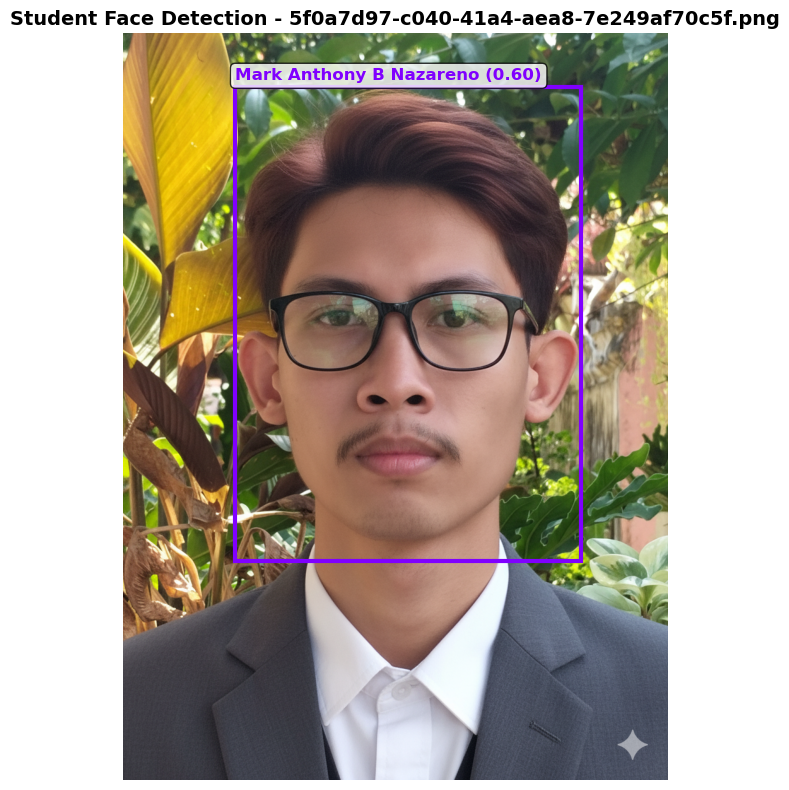


Detections in 5f0a7d97-c040-41a4-aea8-7e249af70c5f.png:
  Total faces detected: 1

  Details:
    1. Mark Anthony B Nazareno (Confidence: 60.34%)


In [32]:
# Function to predict and visualize results on a single image
def predict_and_visualize(model, image_path, conf_threshold=0.25):
    """
    Predict and visualize student faces in an image
    """
    # Perform prediction
    results = model.predict(
        source=image_path,
        conf=conf_threshold,
        save=False,
        verbose=False
    )
    
    # Get the first result
    result = results[0]
    
    # Load and display image with predictions
    img = Image.open(image_path)
    img_array = np.array(img)
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.imshow(img_array)
    
    # Draw bounding boxes
    boxes = result.boxes
    if len(boxes) > 0:
        colors = plt.cm.rainbow(np.linspace(0, 1, len(boxes)))
        
        for idx, box in enumerate(boxes):
            # Get box coordinates
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            conf = box.conf[0].cpu().numpy()
            cls = int(box.cls[0].cpu().numpy())
            
            # Get class name
            class_name = model.names[cls]
            
            # Draw rectangle
            rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=3,
                                edgecolor=colors[idx], facecolor='none')
            ax.add_patch(rect)
            
            # Add label with confidence
            label = f"{class_name} ({conf:.2f})"
            ax.text(x1, y1 - 10, label, color=colors[idx], fontsize=12,
                   weight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_title(f"Student Face Detection - {Path(image_path).name}", fontsize=14, weight='bold')
    ax.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Print detection details
    print(f"\nDetections in {Path(image_path).name}:")
    print(f"  Total faces detected: {len(boxes)}")
    if len(boxes) > 0:
        print("\n  Details:")
        for idx, box in enumerate(boxes):
            conf = box.conf[0].cpu().numpy()
            cls = int(box.cls[0].cpu().numpy())
            class_name = model.names[cls]
            print(f"    {idx+1}. {class_name} (Confidence: {conf:.2%})")
    
    return results

# Test on a sample validation image
sample_val_image = "D:/Zindi/Face Detection/5f0a7d97-c040-41a4-aea8-7e249af70c5f.png"
print(f"Testing on: {sample_val_image}")
results = predict_and_visualize(model, str(sample_val_image), conf_threshold=0.4)

### Video Inference

Let's create a function to identify students in video streams.

In [ ]:
# Function for video inference
import cv2
from IPython.display import display, clear_output

def predict_video(model, video_source=0, conf_threshold=0.25, output_path=None):
    """
    Perform real-time student face detection on video stream
    
    Args:
        model: Trained YOLO model
        video_source: Video file path or camera index (0 for webcam)
        conf_threshold: Confidence threshold for detections
        output_path: Path to save output video (optional)
    """
    # Open video source
    cap = cv2.VideoCapture(video_source)
    
    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Setup video writer if output path is provided
    if output_path:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    print(f"Processing video: {video_source}")
    print(f"Resolution: {width}x{height} @ {fps}fps")
    print("Press 'q' to quit")
    
    frame_count = 0
    detected_students = set()
    
    try:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            
            # Perform prediction
            results = model.predict(
                source=frame,
                conf=conf_threshold,
                verbose=False
            )
            
            # Get annotated frame
            annotated_frame = results[0].plot()
            
            # Collect detected students in this frame
            boxes = results[0].boxes
            for box in boxes:
                cls = int(box.cls[0].cpu().numpy())
                class_name = model.names[cls]
                detected_students.add(class_name)
            
            # Add frame info
            cv2.putText(annotated_frame, f"Frame: {frame_count}", (10, 30),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            cv2.putText(annotated_frame, f"Detected: {len(detected_students)} students", (10, 70),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            
            # Write frame if output path is provided
            if output_path:
                out.write(annotated_frame)
            
            # Display frame (for Jupyter notebook, you might want to use different display method)
            cv2.imshow('Student Face Detection', annotated_frame)
            
            frame_count += 1
            
            # Break on 'q' key press
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
                
    finally:
        # Release resources
        cap.release()
        if output_path:
            out.release()
        cv2.destroyAllWindows()
    
    print(f"\nProcessing complete!")
    print(f"Total frames processed: {frame_count}")
    print(f"Unique students detected: {len(detected_students)}")
    print(f"Students: {', '.join(sorted(detected_students))}")
    
    return list(detected_students)

# Note: Uncomment below to test with webcam (will open camera window)
# detected_students = predict_video(model, video_source=0, conf_threshold=0.25)

# Or test with a video file:
# detected_students = predict_video(model, video_source='path/to/video.mp4', 
#                                   conf_threshold=0.25, output_path='output_video.mp4')

print("✓ Video inference function ready!")
print("\nTo use webcam: predict_video(model, video_source=0)")
print("To use video file: predict_video(model, video_source='video.mp4', output_path='output.mp4')")